## Train on custiom data (detecting Orlen's Logo, Circle K's Logo and Price Tags)


## Setup the envirionment


### Manually
To install necessary libraries we need a pip envirionemnt. To create one navigate to your project directory in cmd. Then run the commands:
- Upgrade `pip` with: `python.exe -m pip install --upgrade pip`
- `python -m venv env`
- `/env/Scripts/activate`
- Install the neccesary libraries. That is `ultralytics` and [`pytorch`](https://pytorch.org/get-started/locally/).
- Install `ipykernel` and add it to the notebook.
- pip install ipykernel
-  python -m ipykernel install --name=env
### Automatically
- Create virtual envirionemt
- `pip install -r requirements.txt`
-  python -m ipykernel install --name=env

## Code!
### Import libraries
In order to use the `YOLO` model we import `ultralytics` library. It is very convienient, because now (for YOLO v8) we can use a pip package. We **do not need to clone the repository** any more. We also need to import  `ipykernel` in order to use `Jupyter Notebooks`.

In [2]:
import torch

from ultralytics import YOLO
from scripts import utils
%matplotlib inline

# Paths to train, validation and test data sets in YOLO format
TRAIN_DIR = r'custom_data/roboflow/images/train'
VAL_DIR = r'custom_data/roboflow/images/valid'
TEST_DIR = r'custom_data/roboflow/images/test'

### Training
For details on how to use the YOLO model check out [ultralytics documentation](https://docs.ultralytics.com/). The cell below will create a YOLO model and transfer pretrained weights. In the next line the model is trained. As the data atributte we specify `config.yaml`, because that is where the paths to data and class names are specified.

In [2]:
device = 0 if torch.cuda.is_available() else 'cpu'

As we can read on the [ultralytics docs page](https://docs.ultralytics.com/usage/cfg/#modes) ,,YOLO settings and hyperparameters play a critical role in the model's performance, speed, and accuracy. These settings and hyperparameters can affect the model's behavior at various stages of the model development process, including training, validation, and prediction".


In [3]:
YOLO_VERBOSE = False

In [4]:
from wandb.integration.yolov8 import add_callbacks as add_wandb_callbacks

model = YOLO('yolov8n.yaml').load('yolov8n.pt') # build from YAML and transfer weights
model.to(device) # Send model to GPU if possible

add_wandb_callbacks(model, project='petrol-prices-object-detection')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [5]:
model.train(
        data="configv2.yaml",  # Path to data file
        epochs=100,
        device=device,
        # project="petrol-prices-object-detection",
        # name=f"yolo-{device}-epochs-{epochs}",
        patience=55,  # Epochs to wait for no observable improvement for early stopping of training
        verbose=False,
        pretrained=True,
        plots=False,  # Don't save plots during train/val
        seed=42)

Ultralytics YOLOv8.0.117  Python-3.10.9 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=configv2.yaml, epochs=100, patience=55, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dy

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 
train: Scanning C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\dataset-v2\train\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\dataset-v2\valid\labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      2.36G       1.67      4.392      1.543          7        640: 100%|██████████| 7/7 [00:26<00:00,  3.85s/it]
                 Class     Images  Ins

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr/pg0,▁▂▄▅▇▇███▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▁▂▄▅▇▇███▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,▁▂▄▅▇▇███▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▃▄▅▆▇▇▇▅▇▇▆▇▇████████████████████████
metrics/mAP50-95(B),▁▂▃▃▃▅▅▆▆▇▆▇█▆▇▇████▇▇█▇▇▇████▇▇▇███████
metrics/precision(B),▁▁▁▇▇█▆▇▆█▆▇█▇██▇▇▇▇▇▇██▇▇██████████████
metrics/recall(B),▁▇█▁▂▄▆▇▆▆▇▆▇▇▇▇█▇▇██▇▇█████████▇███████
train/box_loss,█▆▄▄▄▄▄▄▃▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
train/cls_loss,█▆▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/dfl_loss,█▅▄▃▃▄▄▄▃▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁


In [ ]:
# TODO: Describe the meaning of dl_loss (and other losses), mAP, mAP50 etc.
# It is crucial to show that you understand what you are doing and not onlu use ultralytics implementation

### Plotting predictions
To visualise results of our model we can plot the images with the predicted bounding boxes. To do that we load one of our previously trained models with satisfying results. All `YOLO` models are saved in the `/runs/detect` folder. We need to specify that we want get the best weights of our model. For example the path to a model traind by us could look like: `runs\detect\train22\weights\best.pt`.


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\20220910_202606_jpg.rf.8e280a68116711211e2e01ada832c143.jpg: 640x640 1 orlen, 1 prices, 14.7ms
Speed: 8.8ms preprocess, 14.7ms inference, 69.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_20230606_174710_jpg.rf.2c24f95c364721b9c87e5f11887ab6c5.jpg: 640x640 1 orlen, 1 prices, 18.0ms
Speed: 5.0ms preprocess, 18.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_20230606_193015_jpg.rf.30c164d15d2a356689df2e4369c0cb0e.jpg: 640x640 1 circlek, 2 pricess, 20.0ms
Speed: 11.0ms preprocess, 20.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_202

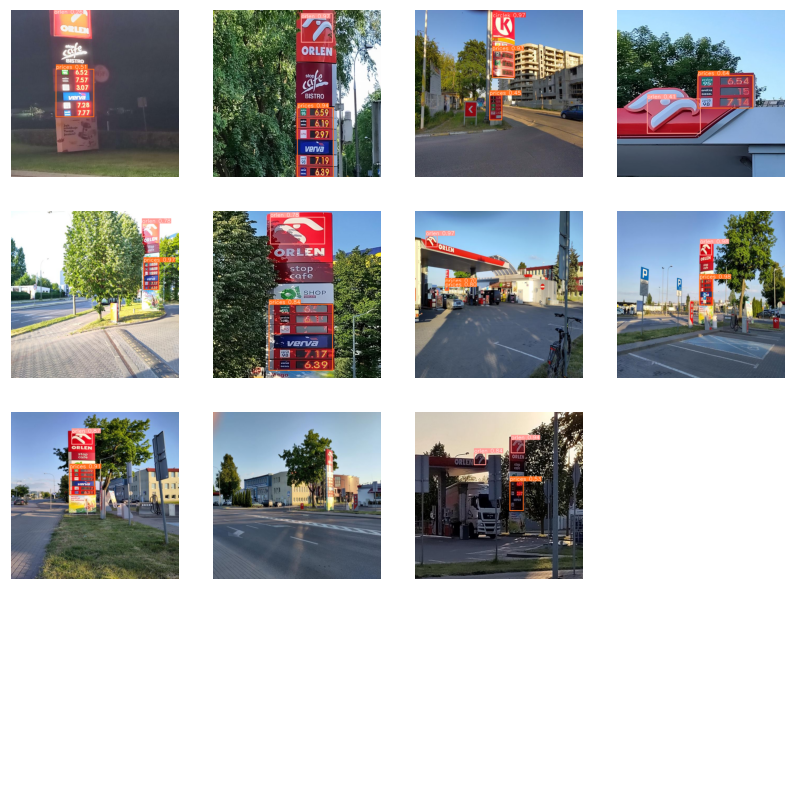

In [3]:
run = 4
path_to_trained_model = fr'runs\detect\train{run}\weights\best.pt'
trained_myself = YOLO(path_to_trained_model) # Load model

# Plot the model results for the validation set
utils.plot_results_one_fig(dir=VAL_DIR, model=trained_myself)

Get size of the model.

In [13]:
import os

size_mb = round(os.path.getsize(path_to_trained_model) / 1024**2, 2) # bytes to megabytes
print(f"Size of the model: {size_mb} MB.")

5.95

### Final test for the model (This is the funny part).


image 1/1 C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\orlen-ultimate-photo.jpg: 640x480 (no detections), 113.7ms
Speed: 5.0ms preprocess, 113.7ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 (no detections), 53.9ms
Speed: 10.0ms preprocess, 53.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


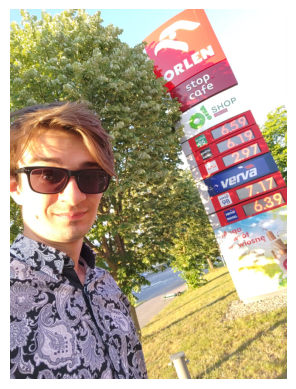

In [ ]:
utils.plot_results(model=trained_myself, image=r'C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\orlen-ultimate-photo.jpg')

In [ ]:
# TODO: Generate requirements.txt
